In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Gerando os dados (entrada, saída)

Text(0, 0.5, 'Saídas: $y$')

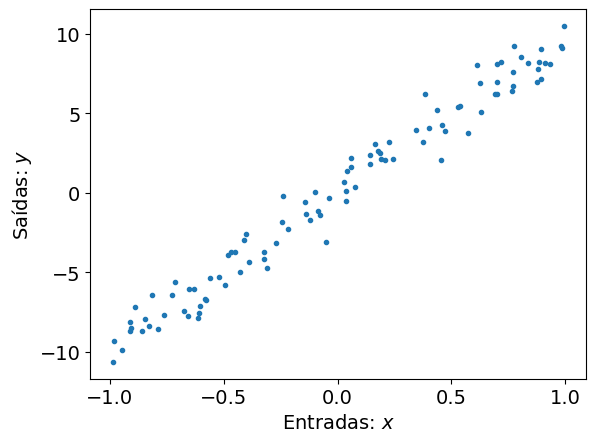

In [5]:
import torch.distributions.uniform as dist

d = dist.Uniform(-1*torch.ones(1), torch.ones(1))
x = d.sample((100,))  # gerando 100 pontos
y = 10*x + torch.randn(100, 1)  # As respostas y sao dadas pela funcao y = 10x + ruído
plt.plot(x, y, '.')
plt.xlabel('Entradas: $x$')
plt.ylabel('Saídas: $y$')

### Executando a otimização

In [10]:
torch.mean( (y - 0.1*x)**2 )


tensor(32.3897)

In [6]:
############ Condições iniciais ###############
theta = torch.randn(1) # valor inicial theta(0)
alpha = 0.1  # passo de aprendizagem
num_iterations = 50  # Numero maximo de iterações


params = list()    # lista para salvar os valores de theta ao longo do treinamento
params.append(theta.item())  # adiciona na lista o valor de theta(0)
for t in range(1, num_iterations+1):
    gradient = -2*torch.mean((y-theta*x)*x) # computa o gradiente (veja formula na nota de aula)
    theta = theta - alpha*gradient  # atualizacao de theta
    if t == 5 or t == 50:
        params.append(theta.item())  # adiciona o valor de theta(5) e theta(50)
print('Valores de theta salvos:', params)

Valores de theta salvos: [0.8710435628890991, 3.6375181674957275, 9.53017520904541]


In [19]:
theta = torch.randn(1, requires_grad=True) # valor inicial theta(0)
alpha = 0.1  # passo de aprendizagem
num_iterations = 50  # Numero maximo de iterações

params = list()    # lista para salvar os valores de theta ao longo do treinamento
params.append(theta.item())  # adiciona na lista o valor de theta(0)
for t in range(1, num_iterations+1):
    loss = torch.mean((y - theta * x)**2)
    loss.backward()

    with torch.no_grad():
        theta -= alpha*theta.grad  # atualizacao de theta
    
    theta.grad.data.zero_()
    if t == 5 or t == 50:
        params.append(theta.item())  # adiciona o valor de theta(5) e theta(50)
print('Valores de theta salvos:', params)

Valores de theta salvos: [-0.7026847004890442, 2.2668662071228027, 9.747618675231934]


### Gráficos

/Users/amaurisouza/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


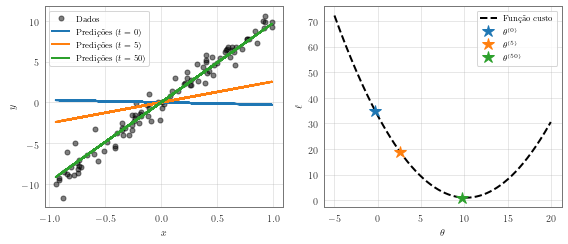

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(8, 3.5)) # modifique os valores (9, 3.5) para tornar seus graficos legais

iterations = [0, 5, 50]  # valores de t de interesse

# Gráfico 1: Predições
axis[0].plot(x, y, '.k', markersize='10', alpha=0.5, label='Dados') # Plota os dados
for i, t in enumerate(iterations):
    axis[0].plot(x, params[i]*x, '-', label="Predições ($t="+str(t)+"$)") # predicoes 

axis[0].set(xlabel='$x$', ylabel='$y$')
axis[0].legend()


# Grafico 2: Função custo
range_theta = torch.linspace(-5, 20, 500) # intervalo dos valores de theta para plotar o gráfico
cost = torch.mean((y-range_theta*x)**2, dim=0)  # calculando a funcao para todos os valores de theta [-5, 20]

axis[1].plot(range_theta, cost, '--k', label='Fun{\c c}\~ao custo')
for i, t in enumerate(iterations):
    axis[1].plot(params[i], torch.mean((y-params[i]*x)**2, dim=0), '*', markersize=12, 
                 label='$\\theta^{('+str(t)+')}$')
axis[1].legend()
axis[1].set(xlabel='$\\theta$', ylabel='$\ell$')
plt.tight_layout()
plt.show()